<a href="https://colab.research.google.com/github/kunal-git-002/facial-landmarks/blob/master/pt5_draw_lines_using_cv2_polylines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pt5 -face landmark detection using dllib & draw lines

>using cv2.polylines











In [1]:
import dlib
import cv2
import numpy as np

from google.colab.patches import cv2_imshow 

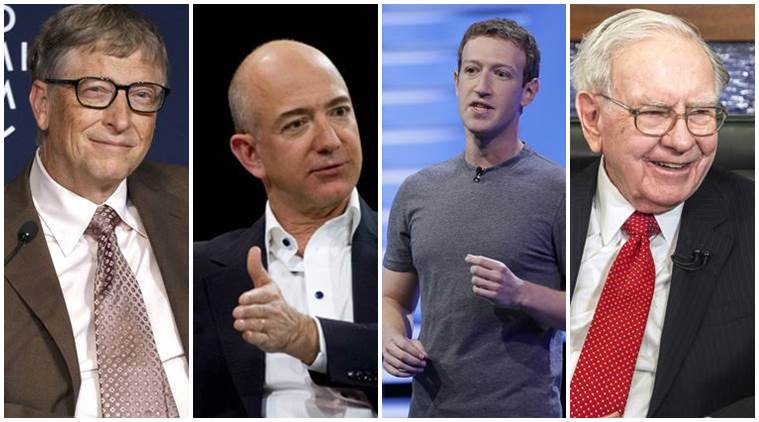

In [52]:
img=cv2.imread("/content/drive/My Drive/face recognition/datas/unknown/all2.jpg")
h,w,ch=img.shape

#img=cv2.resize(img,(int(w/2),int(h/2)))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2_imshow(img)

***all 68 landmarks***
[https://www.google.com/search?q=face+landmarks&tbm=isch&chips=q:face+landmarks,g_1:dlib:kq1U2Cf0vHw%3D&hl=en&sa=X&ved=2ahUKEwijgIz7pK7rAhWMKrcAHYeLCYUQ4lYoAHoECAEQFA&biw=1349&bih=608#imgrc=yeJhsrkezc3dgM](https://www.google.com/search?q=face+landmarks&tbm=isch&chips=q:face+landmarks,g_1:dlib:kq1U2Cf0vHw%3D&hl=en&sa=X&ved=2ahUKEwijgIz7pK7rAhWMKrcAHYeLCYUQ4lYoAHoECAEQFA&biw=1349&bih=608#imgrc=yeJhsrkezc3dgM)

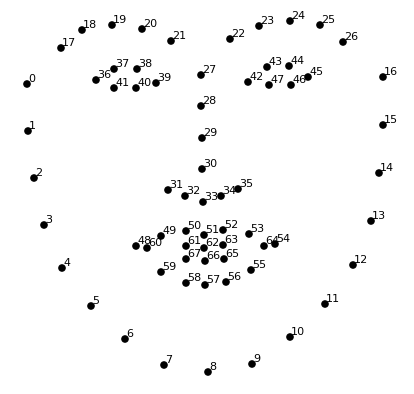

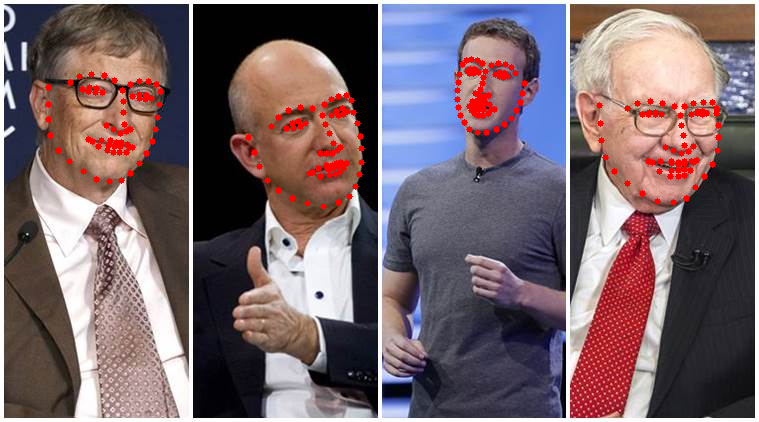

In [53]:
#
detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor("/content/drive/My Drive/face landmarks/methods (fr,dllib)/dlib/shape_predictor_68_face_landmarks.dat")

#detect the faces
faces=detector(gray)
num_of_persons=len(faces)

#landmarks points for all faces present in image
all_persons_landmarks={}#for draw a line

for ind in range(num_of_persons):
  #landmark detection 
  face=faces[ind]
  landmarks_points=[]
  landmarks=predictor(gray,face)

  for i in range(0,68):

    x=landmarks.part(i).x
    y=landmarks.part(i).y 

    landmarks_points.append((x,y))
    #draw circle on landmark
    red=(0,0,255)
    cv2.circle(img,(x,y),3,red,-1)
  
  all_persons_landmarks["person_"+str(ind)]=landmarks_points
cv2_imshow(img)


draw a line using landmarks

> 0-16 left to right 

> 17-21 right eyebrow

> 22-26 left eyebrow

> 27-30 , 31-35 nose

> 36-41 right eye

> 42-47 left eye

> 48-59 outer perimiti of both upper & lower lips

> 60-67 inner perimit of both upper & lower lips

















In [54]:
persons_part_landmarks={}#landmarks of perticuler parts
first_pt=[0,17,22,27,31,36,42,48,60]#parts start point of all parts
person_ind=0
for single_person_landmarks in all_persons_landmarks.values():
  
  landmarks_points=single_person_landmarks
  part_landmarks=[]

  for i in range(len(first_pt)):

    if i==len(first_pt)-1:
      pts=landmarks_points[first_pt[i]:]
      part_landmarks.append(pts)

    else:
      pts=landmarks_points[first_pt[i]:first_pt[i+1]]
      part_landmarks.append(pts)
    
  persons_part_landmarks[person_ind]=part_landmarks
  person_ind+=1

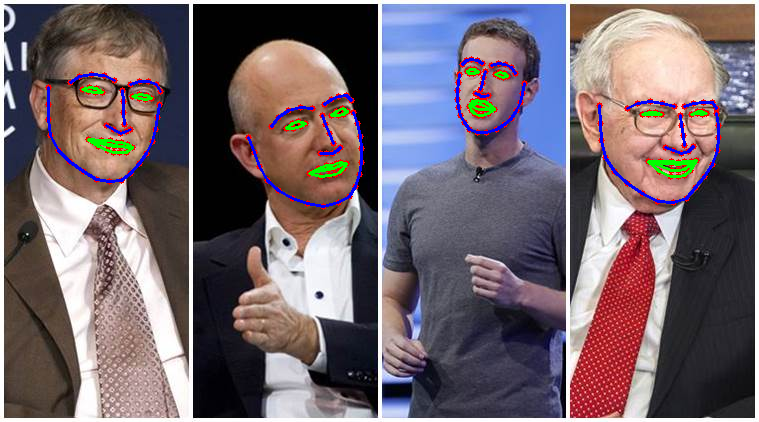

In [55]:
green=(0,255,0)
blue=(255,0,0)
th=2

fm=img

for i in persons_part_landmarks.values():#9
  j =len(i)
  for ind_j in range(j):
    if ind_j<5:#for open regions
    #points(0-16),(17-21),(22-26),(27-30),(31-35)
      pts=np.array(i[ind_j])
      
      isclosed=False
      cv2.polylines(fm,[pts],isclosed,blue,2)
    
    else:#for closed regions
    #points(36-41),(42-47),(48-59),(60-67)
      pts=np.array(i[ind_j])

      isclosed=True
      cv2.polylines(fm,[pts],isclosed,green,2)

cv2_imshow(fm)


***showing only landmarks & lines into black frame or white frame***

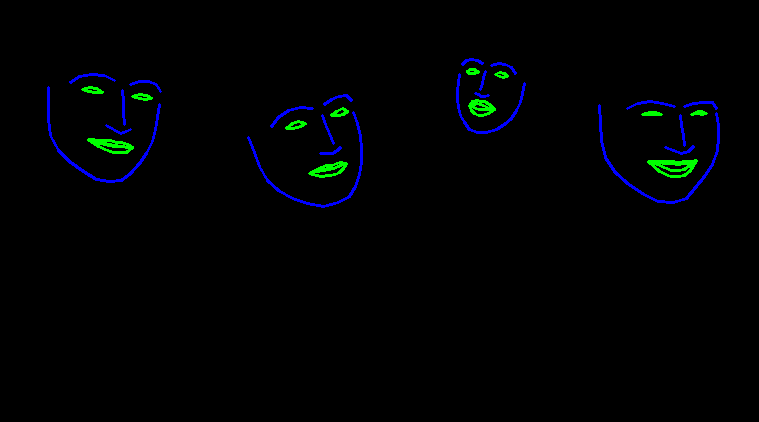

In [56]:
black_frame=np.zeros(shape=img.shape,dtype=np.uint8)#black frame
white_frame=np.full(shape=img.shape,fill_value=255,dtype=np.uint8)#white frame

fm=black_frame

for i in persons_part_landmarks.values():#9
  j =len(i)
  for ind_j in range(j):
    if ind_j<5:#for open regions
    #points(0-16),(17-21),(22-26),(27-30),(31-35)
      pts=np.array(i[ind_j])
      
      isclosed=False
      cv2.polylines(fm,[pts],isclosed,blue,2)
    
    else:#for closed regions
    #points(36-41),(42-47),(48-59),(60-67)
      pts=np.array(i[ind_j])

      isclosed=True
      cv2.polylines(fm,[pts],isclosed,green,2)

cv2_imshow(fm)